In [1]:
from datasets import load_dataset,load_from_disk
# \t is the tab character in Python
data_dict = load_from_disk('dataset_aug')
data_dict=data_dict.select_columns(['smi','logkOH•'])

In [0]:
from utls import GPT2LinearOutput,tokenizer
from torch import nn
criterion = nn.MSELoss()
model =GPT2LinearOutput(8,0.2,0.13)
def caculate(loader,model):
    losses=[]
    model.eval()
    for batch in loader:
        with torch.no_grad():
            labels = batch['logkOH•']
            batch['input_ids']=batch['input_ids'].to(torch.int64)
            logits = model(batch['input_ids'],batch['attention_mask'])[0].squeeze()[torch.arange(0,len(batch['input_ids'])),batch['length']]
            loss = criterion(logits, labels)
            losses.append(loss.unsqueeze(dim=0))
    torch.cuda.empty_cache()
    return torch.sqrt(torch.mean(torch.cat(losses,dim=0))).cpu().numpy()


from sklearn.metrics import r2_score
def caculater2(loader,model):
    y_true=[]
    y_pre=[]
    model.eval()
    for batch in loader:
        with torch.no_grad():
            labels = batch['logkOH•']
            batch['input_ids']=batch['input_ids'].to(torch.int64)
            logits = model(batch['input_ids'],batch['attention_mask'])[0].squeeze()[torch.arange(0,len(batch['input_ids'])),batch['length']]
            y_true.extend(labels.cpu().numpy())
            y_pre.extend(logits.cpu().numpy())
    return r2_score(y_true,y_pre)

In [14]:
from torch.utils.data import DataLoader
from datasets import Dataset
from accelerate import Accelerator
import pandas as pd
from rdkit import Chem,DataStructs
threshold=0.04
train_fp=[]
for i in data_dict['valid']:
    mol=Chem.MolFromSmiles(i['smi'])
    try:
        Tanimoto=Chem.RDKFingerprint(mol)
        train_fp.append(Tanimoto)
    except Exception as e:
        continue

remained_item=[]
for i in data_dict['test']:
    try:
        Tanimoto_test = Chem.RDKFingerprint(Chem.MolFromSmiles(i['smi']))
    except Exception as e:
        continue
    temp=[]
    for train in train_fp:
        temp.append(DataStructs.FingerprintSimilarity(Tanimoto_test,train))
    mean_simu=sum(temp)/len(temp)

    if mean_simu>threshold:
        remained_item.append(i)

dataset_ad=Dataset.from_pandas(pd.DataFrame(remained_item))
dataset_ad.save_to_disk('dataset_ad')

[14:55:11] WARNING: not removing hydrogen atom without neighbors


Saving the dataset (0/1 shards):   0%|          | 0/121 [00:00<?, ? examples/s]

[15:46:12] WARNING: not removing hydrogen atom without neighbors
C:\Users\52551\AppData\Local\Temp\ipykernel_10932\3945935966.py:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


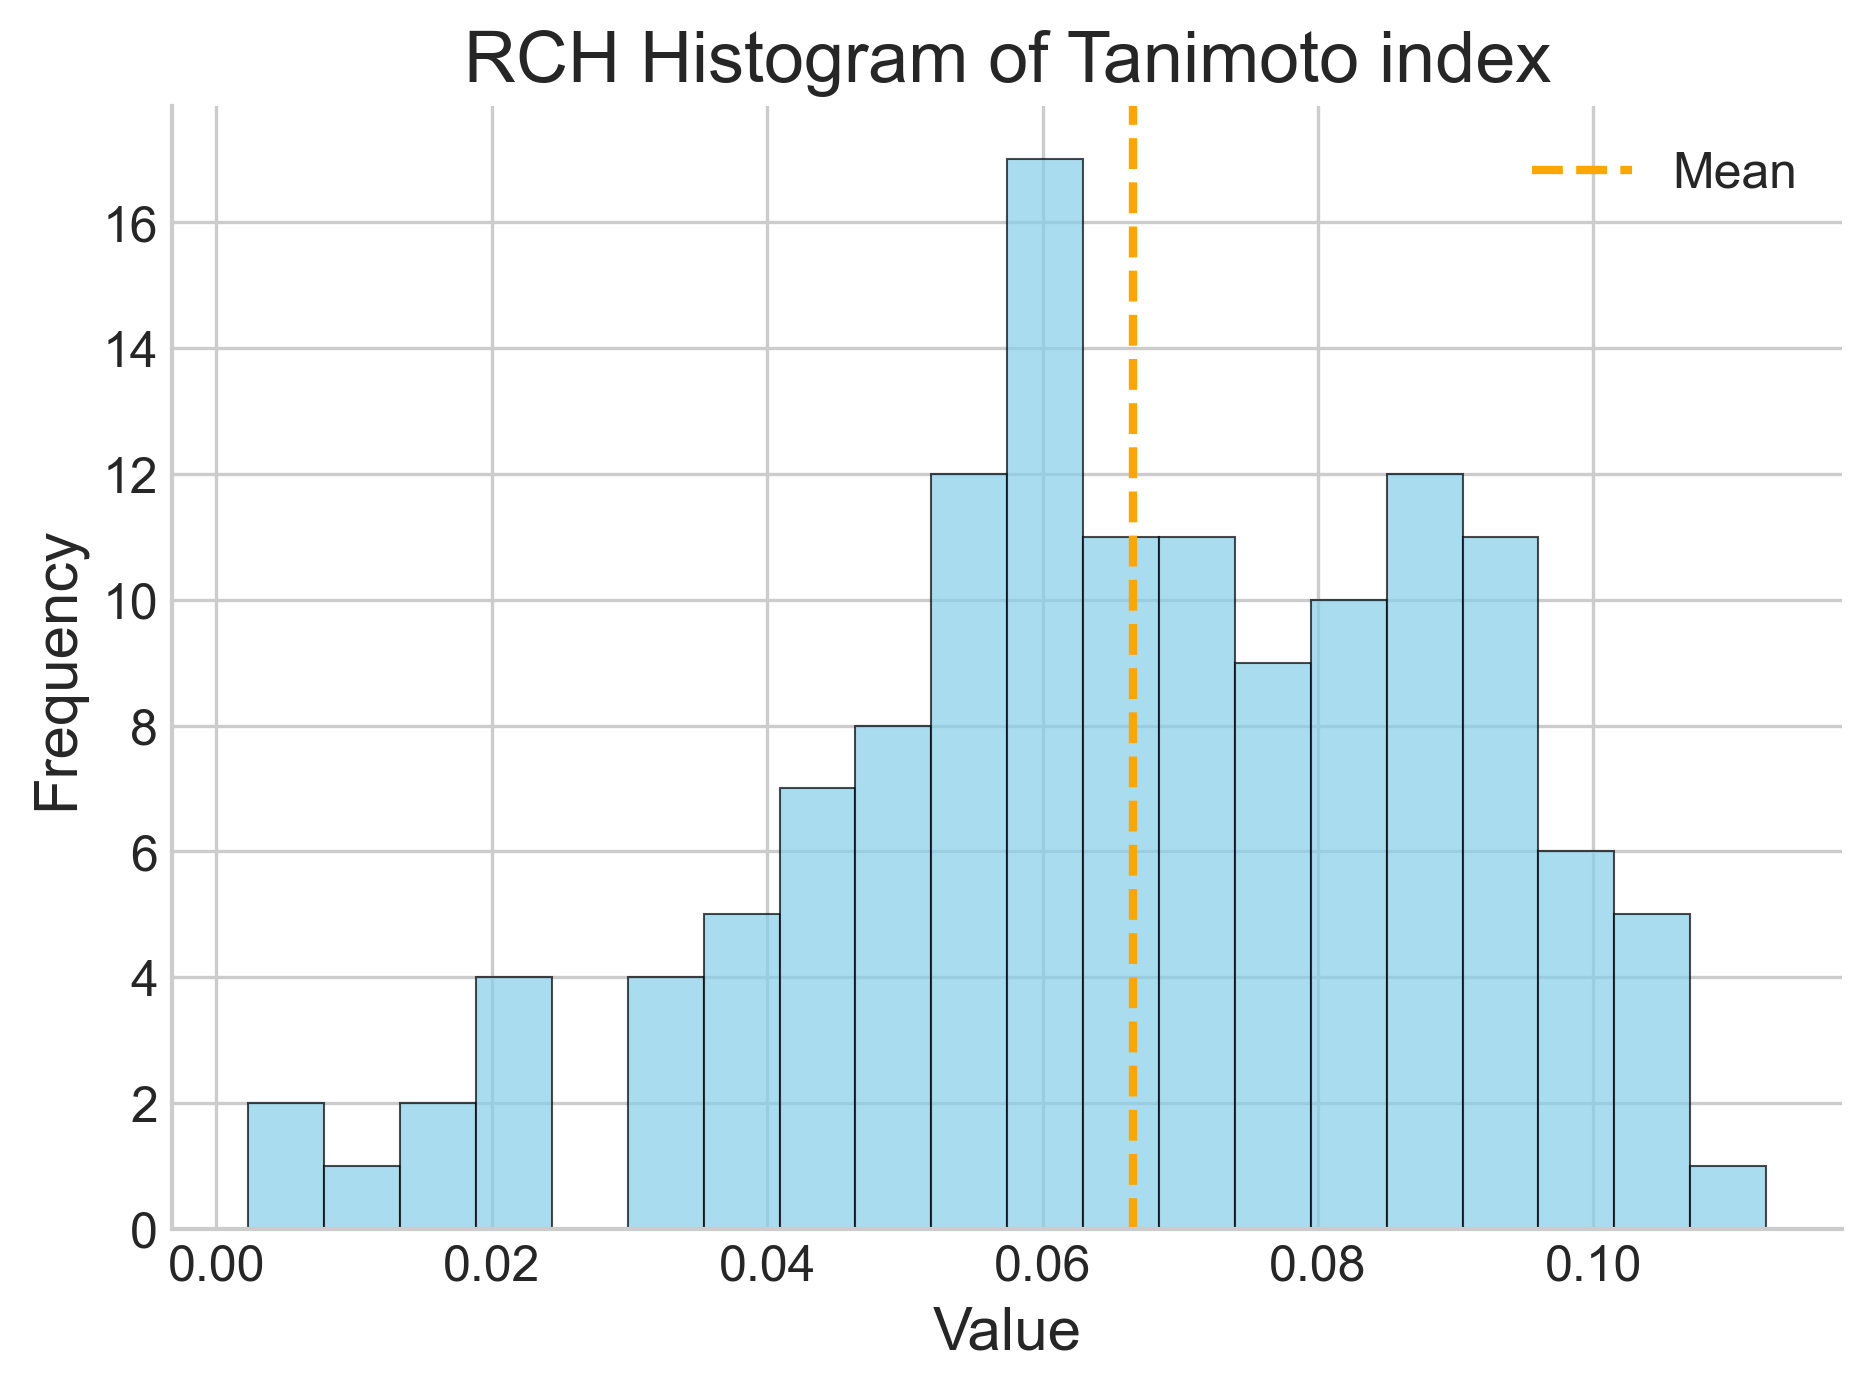

In [16]:
from torch.utils.data import DataLoader
from datasets import Dataset
from accelerate import Accelerator
from rdkit import Chem,DataStructs
from matplotlib import pyplot as plt
import numpy as np

train_fp=[]
for i in data_dict['valid']:
    mol=Chem.MolFromSmiles(i['smi'])
    try:
        Tanimoto=Chem.RDKFingerprint(mol)
        train_fp.append(Tanimoto)
    except Exception as e:
        continue

remained_item=[]
for i in data_dict['test']:
    try:
        Tanimoto_test = Chem.RDKFingerprint(Chem.MolFromSmiles(i['smi']))
    except Exception as e:
        continue
    temp=[]
    for train in train_fp:
        temp.append(DataStructs.FingerprintSimilarity(Tanimoto_test,train))
    mean_simu=sum(temp)/len(temp)
    remained_item.append(mean_simu)

plt.figure(dpi=300)
plt.style.use('seaborn-whitegrid')

plt.hist(remained_item, bins=20, color='skyblue', alpha=0.7, edgecolor='black')

plt.title('RCH Histogram of Tanimoto index')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axvline(np.mean(remained_item), color='orange', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()

plt.rc('font', size=12)

plt.show()


[12:15:49] WARNING: not removing hydrogen atom without neighbors
[12:15:49] WARNING: not removing hydrogen atom without neighbors
[12:15:49] WARNING: not removing hydrogen atom without neighbors
[12:15:49] WARNING: not removing hydrogen atom without neighbors
[12:15:49] WARNING: not removing hydrogen atom without neighbors
[12:15:49] WARNING: not removing hydrogen atom without neighbors
[12:15:50] WARNING: not removing hydrogen atom without neighbors


Map:   0%|          | 0/138 [00:00<?, ? examples/s]

Map:   0%|          | 0/138 [00:00<?, ? examples/s]

138
threshold:0.0,r2:0.737983105689609,rmse:0.3035854399204254


[12:15:51] WARNING: not removing hydrogen atom without neighbors
[12:15:51] WARNING: not removing hydrogen atom without neighbors
[12:15:51] WARNING: not removing hydrogen atom without neighbors
[12:15:51] WARNING: not removing hydrogen atom without neighbors
[12:15:51] WARNING: not removing hydrogen atom without neighbors
[12:15:51] WARNING: not removing hydrogen atom without neighbors
[12:15:51] WARNING: not removing hydrogen atom without neighbors


Map:   0%|          | 0/136 [00:00<?, ? examples/s]

Map:   0%|          | 0/136 [00:00<?, ? examples/s]

136
threshold:0.01,r2:0.7435831479028446,rmse:0.3018435537815094


[12:15:52] WARNING: not removing hydrogen atom without neighbors
[12:15:52] WARNING: not removing hydrogen atom without neighbors
[12:15:52] WARNING: not removing hydrogen atom without neighbors
[12:15:53] WARNING: not removing hydrogen atom without neighbors
[12:15:53] WARNING: not removing hydrogen atom without neighbors
[12:15:53] WARNING: not removing hydrogen atom without neighbors
[12:15:53] WARNING: not removing hydrogen atom without neighbors


Map:   0%|          | 0/132 [00:00<?, ? examples/s]

Map:   0%|          | 0/132 [00:00<?, ? examples/s]

132
threshold:0.02,r2:0.7446236157228294,rmse:0.3048436939716339


[12:15:54] WARNING: not removing hydrogen atom without neighbors
[12:15:54] WARNING: not removing hydrogen atom without neighbors
[12:15:54] WARNING: not removing hydrogen atom without neighbors
[12:15:54] WARNING: not removing hydrogen atom without neighbors
[12:15:54] WARNING: not removing hydrogen atom without neighbors
[12:15:54] WARNING: not removing hydrogen atom without neighbors
[12:15:55] WARNING: not removing hydrogen atom without neighbors


Map:   0%|          | 0/122 [00:00<?, ? examples/s]

Map:   0%|          | 0/122 [00:00<?, ? examples/s]

122
threshold:0.03,r2:0.7361930862326975,rmse:0.2999788522720337


[12:15:55] WARNING: not removing hydrogen atom without neighbors
[12:15:55] WARNING: not removing hydrogen atom without neighbors
[12:15:55] WARNING: not removing hydrogen atom without neighbors
[12:15:56] WARNING: not removing hydrogen atom without neighbors
[12:15:56] WARNING: not removing hydrogen atom without neighbors
[12:15:56] WARNING: not removing hydrogen atom without neighbors
[12:15:56] WARNING: not removing hydrogen atom without neighbors


Map:   0%|          | 0/118 [00:00<?, ? examples/s]

Map:   0%|          | 0/118 [00:00<?, ? examples/s]

118
threshold:0.04,r2:0.7777203634672233,rmse:0.2745658755302429


[12:15:57] WARNING: not removing hydrogen atom without neighbors
[12:15:57] WARNING: not removing hydrogen atom without neighbors
[12:15:57] WARNING: not removing hydrogen atom without neighbors
[12:15:57] WARNING: not removing hydrogen atom without neighbors
[12:15:57] WARNING: not removing hydrogen atom without neighbors
[12:15:57] WARNING: not removing hydrogen atom without neighbors
[12:15:58] WARNING: not removing hydrogen atom without neighbors


Map:   0%|          | 0/101 [00:00<?, ? examples/s]

Map:   0%|          | 0/101 [00:00<?, ? examples/s]

101
threshold:0.05,r2:0.7709994654841361,rmse:0.25492438673973083


[12:15:58] WARNING: not removing hydrogen atom without neighbors
[12:15:58] WARNING: not removing hydrogen atom without neighbors
[12:15:58] WARNING: not removing hydrogen atom without neighbors
[12:15:59] WARNING: not removing hydrogen atom without neighbors
[12:15:59] WARNING: not removing hydrogen atom without neighbors
[12:15:59] WARNING: not removing hydrogen atom without neighbors
[12:15:59] WARNING: not removing hydrogen atom without neighbors


Map:   0%|          | 0/91 [00:00<?, ? examples/s]

Map:   0%|          | 0/91 [00:00<?, ? examples/s]

91
threshold:0.06,r2:0.7368356029514462,rmse:0.2576204240322113


[12:16:00] WARNING: not removing hydrogen atom without neighbors
[12:16:00] WARNING: not removing hydrogen atom without neighbors
[12:16:00] WARNING: not removing hydrogen atom without neighbors
[12:16:00] WARNING: not removing hydrogen atom without neighbors
[12:16:00] WARNING: not removing hydrogen atom without neighbors
[12:16:00] WARNING: not removing hydrogen atom without neighbors
[12:16:01] WARNING: not removing hydrogen atom without neighbors


Map:   0%|          | 0/64 [00:00<?, ? examples/s]

Map:   0%|          | 0/64 [00:00<?, ? examples/s]

64
threshold:0.07,r2:0.7362777221530727,rmse:0.27130308747291565


[12:16:02] WARNING: not removing hydrogen atom without neighbors
[12:16:02] WARNING: not removing hydrogen atom without neighbors
[12:16:02] WARNING: not removing hydrogen atom without neighbors
[12:16:02] WARNING: not removing hydrogen atom without neighbors
[12:16:02] WARNING: not removing hydrogen atom without neighbors
[12:16:02] WARNING: not removing hydrogen atom without neighbors
[12:16:02] WARNING: not removing hydrogen atom without neighbors


Map:   0%|          | 0/46 [00:00<?, ? examples/s]

Map:   0%|          | 0/46 [00:00<?, ? examples/s]

46
threshold:0.08,r2:0.7278049294298818,rmse:0.22208113968372345


[12:16:03] WARNING: not removing hydrogen atom without neighbors
[12:16:03] WARNING: not removing hydrogen atom without neighbors
[12:16:03] WARNING: not removing hydrogen atom without neighbors
[12:16:03] WARNING: not removing hydrogen atom without neighbors
[12:16:03] WARNING: not removing hydrogen atom without neighbors
[12:16:03] WARNING: not removing hydrogen atom without neighbors
[12:16:04] WARNING: not removing hydrogen atom without neighbors


Map:   0%|          | 0/30 [00:00<?, ? examples/s]

Map:   0%|          | 0/30 [00:00<?, ? examples/s]

30
threshold:0.09,r2:0.5876079496908136,rmse:0.2501647174358368


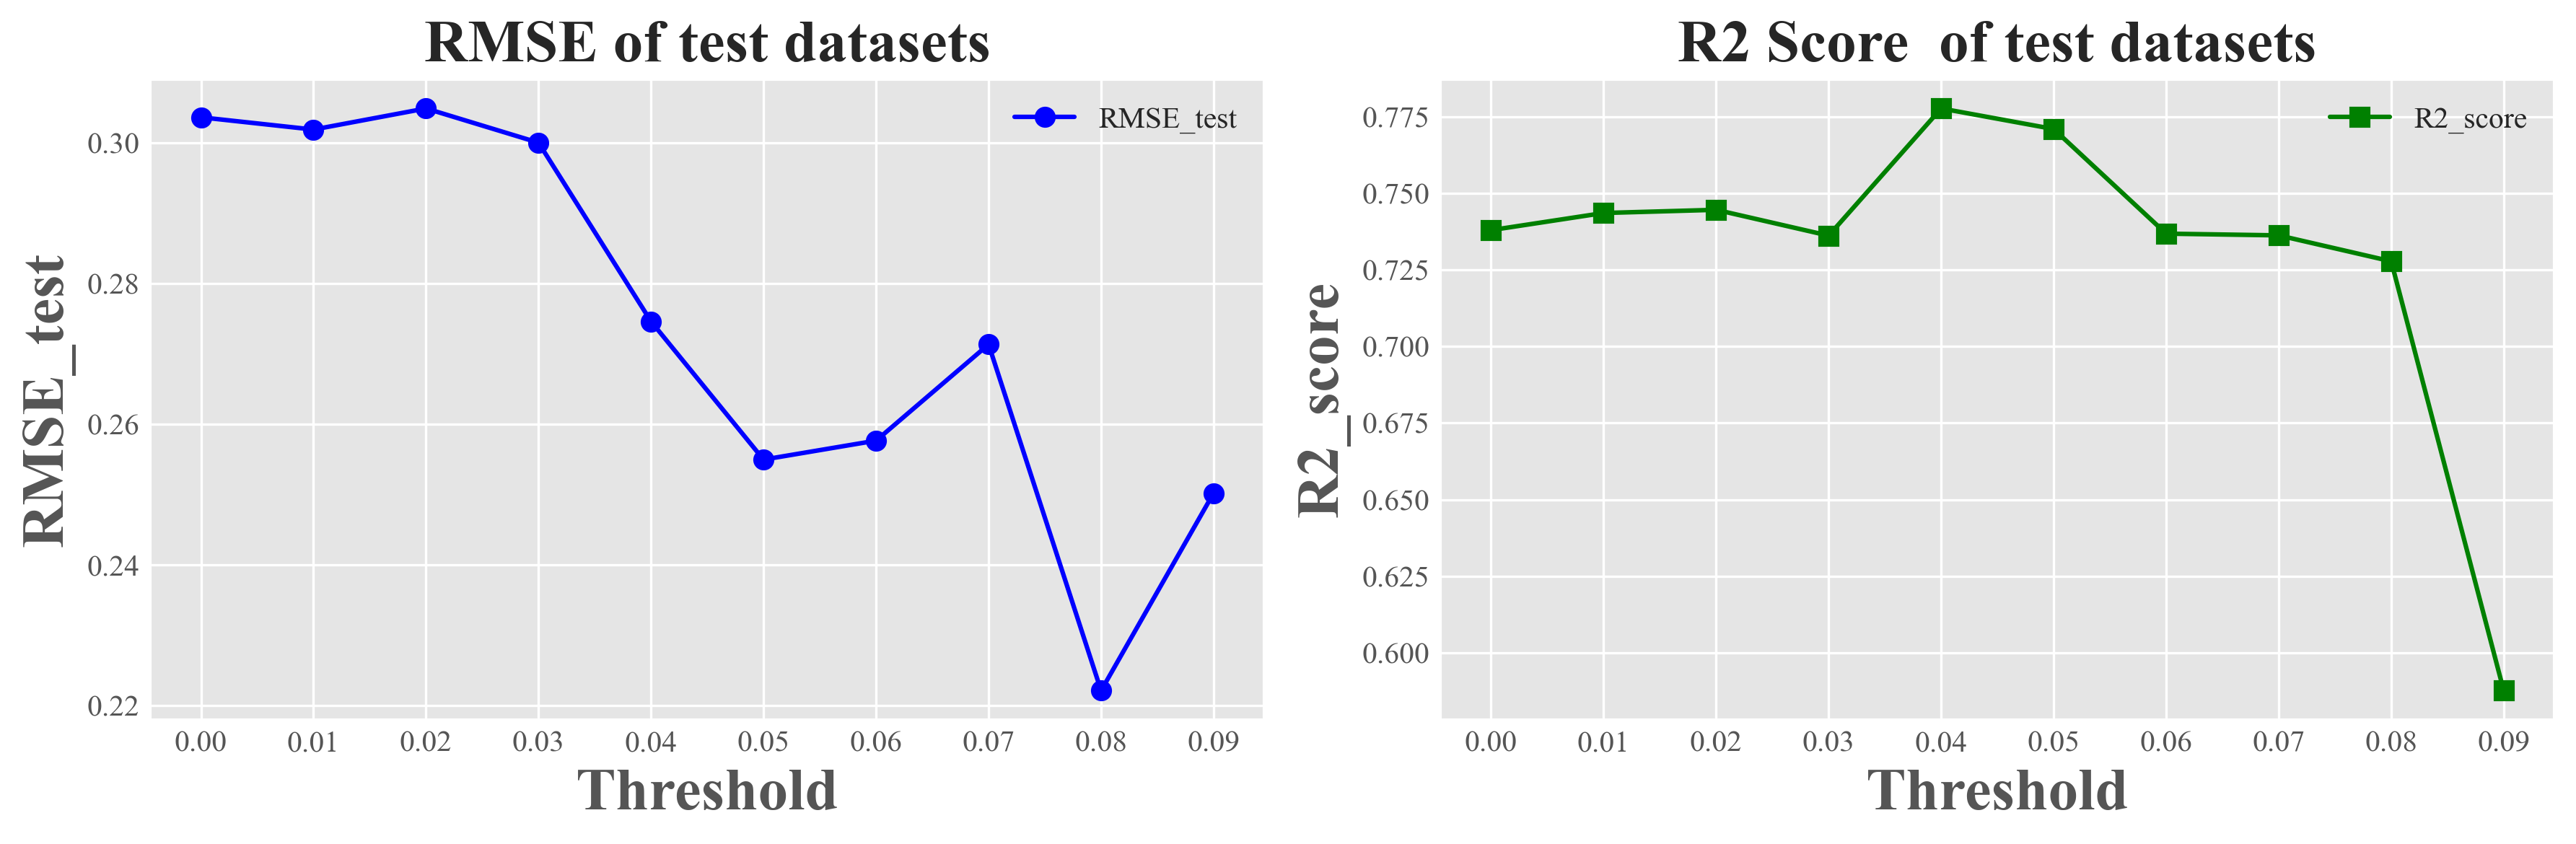

In [11]:
from transformers import DataCollatorWithPadding
import torch
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from datasets import Dataset
from accelerate import Accelerator
import numpy as np
from rdkit import Chem, DataStructs
import pandas as pd
thresholds=np.arange(0,0.1,0.01)
outputs_rmse=[]
outputs_r2=[]

for threshold in thresholds:
    train_fp=[]
    for i in data_dict['train']:
        mol=Chem.MolFromSmiles(i['smi'])
        try:
            Tanimoto=Chem.RDKFingerprint(mol)
            train_fp.append(Tanimoto)
        except Exception as e:
            continue

    remained_item=[]
    for i in data_dict['test']:
        try:
            Tanimoto_test = Chem.RDKFingerprint(Chem.MolFromSmiles(i['smi']))
        except Exception as e:
            continue
        temp=[]
        for train in train_fp:
            temp.append(DataStructs.FingerprintSimilarity(Tanimoto_test,train))
        mean_simu=sum(temp)/len(temp)

    # plt.figure(dpi=300)
    # plt.style.use('seaborn-whitegrid')
    #
    # plt.hist(remained_item, bins=20, color='skyblue', alpha=0.7, edgecolor='black')
    #
    # plt.title('Histogram of Tanimoto_index')
    # plt.xlabel('Value')
    # plt.ylabel('Frequency')
    #
    # plt.tight_layout()
    #
    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    #
    # plt.axvline(np.mean(remained_item), color='orange', linestyle='dashed', linewidth=2, label='Mean')
    # plt.legend()
    #
    # plt.rc('font', size=12)
    #
    # plt.show()

        if mean_simu>threshold:
            remained_item.append(i)
    data_pd=pd.DataFrame(remained_item)
    datasets=Dataset.from_pandas(data_pd)

    tokenized_dataset = datasets.map(
    lambda element: tokenizer(element['smi']), batched=True)
    def returnlength(example):
        return  {'length':len(example['input_ids'])-1}
    tokenized_dataset = tokenized_dataset.select_columns(['input_ids', 'attention_mask', 'logkOH•'])
    tokenized_dataset=tokenized_dataset.map(returnlength)

    data_collator=DataCollatorWithPadding(tokenizer=tokenizer)
    tokenized_dataset.set_format("torch")
    loader_test=DataLoader(tokenized_dataset,batch_size=len(tokenized_dataset),collate_fn=data_collator)
    print(len(tokenized_dataset))


    model.load_state_dict(torch.load('best_val.model'))
    model,loader_test=Accelerator().prepare(model,loader_test)

    Rmse=caculate(loader_test, model)

    outputs_rmse.append(Rmse)
    r2=caculater2(loader_test,model)
    outputs_r2.append(r2)

    print(f'threshold:{threshold},r2:{r2},rmse:{Rmse}')

    # for item in remained_item:
    #     smi = item.smiles
    #     condition = smi == data['smi']
    #     data.loc[condition, 'AD_screening'] = 1
    # data.to_excel('data_final.xlsx')

# Set up a custom style for the plots
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Times New Roman'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=300)

# Plot the first graph (RMSE_test)
ax1.plot(thresholds, outputs_rmse, marker='o', color='b', label='RMSE_test')
ax1.set_xticks(thresholds)
ax1.set_xlabel('Threshold', fontsize=20, fontweight='bold')
ax1.set_ylabel('RMSE_test', fontsize=20, fontweight='bold')
ax1.set_title('RMSE of test datasets', fontsize=20, fontweight='bold')
ax1.legend()

# Plot the second graph (R2_score)
ax2.plot(thresholds, outputs_r2, marker='s', color='g', label='R2_score')
ax2.set_xticks(thresholds)
ax2.set_xlabel('Threshold', fontsize=20, fontweight='bold')
ax2.set_ylabel('R2_score', fontsize=20, fontweight='bold')
ax2.set_title('R2 Score  of test datasets', fontsize=20, fontweight='bold')
ax2.legend()

# Adjust the layout to avoid overlapping labels and titles
plt.tight_layout()

# Save the figure (optional)
# plt.savefig('output_figure.png', dpi=300)

# Show the plots
plt.show()
